In [1]:
!pip install xgboost

    100% |████████████████████████████████| 686kB 1.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /Users/snerur/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
#This example is from: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
#URL for the dataset is given below
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"


In [4]:
#import required packages
import pandas as pd #for reading in data
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv(url, header=None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
1,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
2,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
3,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
4,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
5,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
6,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
7,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
8,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
#any missing values
data.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [10]:
#the last column is the target
features = data[data.columns[:-1]]
target = data[data.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, \
                                                   random_state = 99)


In [11]:
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [14]:
print("Train accuracy: ", classifier.score(x_train,y_train))
print("Test accuracy: ", classifier.score(x_test,y_test))

Train accuracy:  0.9087523277467412
Test accuracy:  0.7575757575757576


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
predicted = classifier.predict(x_test)
confusion_matrix(y_test, predicted)

array([[120,  35],
       [ 21,  55]])

In [19]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       155
           1       0.61      0.72      0.66        76

    accuracy                           0.76       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.76      0.76       231



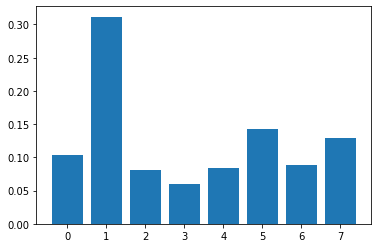

In [23]:
import matplotlib.pyplot as plt
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.show()

In [40]:
#let us try a Voting Classifier - a majority vote classifier that aggregates the predictions of
#several weak classifiers

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC


lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
knn = KNeighborsClassifier()
xg = xgb.XGBClassifier()
svc = SVC(gamma = 'auto')

In [45]:
from sklearn.metrics import accuracy_score
voting_classifier = VotingClassifier(
                        estimators = [('svc', svc),('lr', lr),('knn', knn),('xg', xg)],voting = 'hard')
for classifier in (svc, lr, knn, xg, voting_classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print(classifier.__class__.__name__, ": ", accuracy_score(y_test, y_pred))
    

SVC :  0.670995670995671
LogisticRegression :  0.7748917748917749
KNeighborsClassifier :  0.7532467532467533
XGBClassifier :  0.7575757575757576
VotingClassifier :  0.7792207792207793


In [44]:
#with soft voting
voting_classifier = VotingClassifier(
                        estimators = [('lr', lr),('knn', knn),('xg', xg)],voting = 'soft')
for classifier in (lr, knn, xg, voting_classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print(classifier.__class__.__name__, ": ", accuracy_score(y_test, y_pred))
    

LogisticRegression :  0.7748917748917749
KNeighborsClassifier :  0.7532467532467533
XGBClassifier :  0.7575757575757576
VotingClassifier :  0.7878787878787878
